# Final Analysis

## Loading the data

In [1]:
import pandas

# see 5_verse_lines_with_meter.ipynb for details on this file
df_rv_lines_with_meter = pandas.read_csv("data/rv_lines_with_meter.csv", keep_default_na=False)

#df_rv_lines.head()
df_rv_lines_with_meter

,line_no,stem,stem_type,root_guess,variant_no,weak_only,attestation_texts,language_period,present_class,root,...,meter_fault_positions,text_samhitapatha_normalized,meter_stem_found,meter_stem_positions,meter_stem_fault_positions,meter_stem_vowel_position,meter_stem_root_vowel_position,meter_stem_fault_position_labels,meter_stem_vowel_position_scansion_expected,meter_stem_root_vowel_position_scansion_expected
0,01.063.02.d,iṣṇā,strong,iṣ,,False,,Earlier,ninth,iṣ 1,...,[],púra iṣṇā́si puruhūta pūrvī́ḥ,iṣṇā,"[3, 4]",[],4,3,,X,X
1,01.063.04.b,ubhnā,strong,ubh,,False,V.,Earlier,ninth,ubh,...,[],vr̥tráṁ yád vajrin vr̥ṣakarman ubhnā́ḥ,ubhnā,"[10, 11]",[],11,10,,X,L
2,04.019.04.c,ubhnā,strong,ubh,,False,V.,Earlier,ninth,ubh,...,[],dr̥̄ḷhā́ni aubhnād uśámāna ójo,ubhnā,"[4, 5]",[],5,4,,,
3,04.018.12.d,kṣiṇā,strong,kṣi,,False,V.B.,Earlier,ninth,kṣī,...,[],yát prā́kṣiṇāḥ pitáram pādagŕ̥hya,kṣiṇā,"[2, 3, 4]",[],4,3,,X,X
4,10.027.04.d,kṣiṇā,strong,kṣi,,False,V.B.,Earlier,ninth,kṣī,...,[],prá táṁ kṣiṇām párvate pādagŕ̥hya,kṣiṇā,"[3, 4]",[],4,3,,X,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,09.097.04.b,hino,strong,hi,,False,,Earlier & Later,fifth,hi,...,[],sómaṁ hinota mahaté dhánāya,hino,"[3, 4]",[],4,3,,X,X
877,10.016.09.a,hino,strong,hi,,False,,Earlier & Later,fifth,hi,...,[],kravyā́dam agním prá hiṇomi dūráṁ,hiṇo,"[7, 8]",[],8,7,,L,S
878,10.030.07.d,hino,strong,hi,,False,,Earlier & Later,fifth,hi,...,[],devamā́danam prá hiṇotanāpaḥ,hiṇo,"[7, 8]",[],8,7,,L,S
879,10.030.08.a,hino,strong,hi,,False,,Earlier & Later,fifth,hi,...,[],prā́smai hinota mádhumantam ūrmíṁ,hino,"[3, 4]",[],4,3,,X,X


In [2]:
df_rv_lines_with_meter.dtypes

line_no                                              object
stem                                                 object
stem_type                                            object
root_guess                                           object
variant_no                                           object
weak_only                                              bool
attestation_texts                                    object
language_period                                      object
present_class                                        object
root                                                 object
book                                                  int64
hymn                                                float64
stanza                                               object
pada_id                                              object
pada_label                                           object
word                                                 object
word_position_no                        

List of columns useful for our analysis:

In [3]:
COLUMNS_BASE = [
    # our variables
    "present_class", "stem_type", "stem",
    # stem attestations
    "line_no", "text_samhitapatha", 
    # meter scansion
    "stanza_meter", "meter_scansion_custom",
    # stem in the meter
    "meter_stem_vowel_position_scansion_expected",
    "meter_stem_root_vowel_position_scansion_expected",
    "meter_stem_positions",
    # meter faults and notes
    "meter_faults",
    "meter_notes", "meter_has_restorations",
    # pada and stanza metadata
    "pada_label", "stanza_strata", "stanza_strata_based_on_meter_only", "stanza_late_addition",
    # useful extras
    "root", "word", "word_gloss",
]

Ensure that the stanza strata is ordered chronologically when sorting by it:

In [4]:
df_rv_lines_with_meter["stanza_strata"] = pandas.Categorical(
    df_rv_lines_with_meter["stanza_strata"],
    [
        "A", # archaic
        "S", # strophic
        "N", # normal
        "C", # cretic
        "P", # popular
        #"a", "s", "n", "c", "p", # minor stratas
    ]
)

## Filtering the data

For our final analaysis, remove lines that:

* belong to stanzas with meter not specified
* follow the epic variant of the anustubh meter (this is a later creation and does not conform to the earlier anustubh standard)

In [5]:
# TODO! add others criterias?
# TODO! should do pada_label check without the P;
df_rv_lines_with_meter_filtered = df_rv_lines_with_meter \
    .query('\
        stanza_meter != "" \
        and pada_label not in ["PE3b", "PE3a", "PE2", "PE1"] \
    ')

df_rv_lines_with_meter_filtered[COLUMNS_BASE]

,present_class,stem_type,stem,line_no,text_samhitapatha,stanza_meter,meter_scansion_custom,meter_stem_vowel_position_scansion_expected,meter_stem_root_vowel_position_scansion_expected,meter_stem_positions,meter_faults,meter_notes,meter_has_restorations,pada_label,stanza_strata,stanza_strata_based_on_meter_only,stanza_late_addition,root,word,word_gloss
0,ninth,strong,iṣṇā,01.063.02.d,púra iṣṇā́si puruhūta pūrvī́ḥ,Triṣṭubh,"SS LLS ,SS|LS LL",X,X,"[3, 4]",,,False,M,A,False,,iṣ 1,iṣṇā́si,2.SG.PRS.IND.ACT
1,ninth,strong,ubhnā,01.063.04.b,vr̥tráṁ yád vajrin vr̥ṣakarman ubhnā́ḥ,Triṣṭubh,"LL L LL ,SS|LS_LL",X,L,"[10, 11]",,,False,Mh,A,False,,ubh,ubhnā́ḥ,3.SG.PRS.INJ.ACT
3,ninth,strong,kṣiṇā,04.018.12.d,yát prā́kṣiṇāḥ pitáram pādagŕ̥hya,Triṣṭubh,"L LSL ,SSL |LSLS",X,X,"[2, 3, 4]",,,False,P,P,False,"['Grassmann (G)', 'Arnold (C1)']",kṣī,ákṣiṇāḥ,2.SG.IPRF.IND.ACT
4,ninth,strong,kṣiṇā,10.027.04.d,prá táṁ kṣiṇām párvate pādagŕ̥hya,Triṣṭubh,"S L SL ,LSL |LSLS",X,X,"[3, 4]",,,False,P,P,False,['Arnold (C1)'],kṣī,kṣiṇām,1.SG.PRS.INJ.ACT
5,ninth,strong,kṣiṇā,10.027.13.c,ā́sīna ūrdhvā́m upási kṣiṇāti,Triṣṭubh,"LLS LL,_SS|_LSLS",L,S,"[8, 9, 10]",,caesura_position_inside_syllable=True,False,P,P,False,['Arnold (C1)'],kṣī,kṣiṇāti,3.SG.PRS.IND.ACT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,fifth,strong,hino,09.097.04.b,sómaṁ hinota mahaté dhánāya,Triṣṭubh,"LL SLS ,SS|L SLS",X,X,"[3, 4]",,,False,M,N,False,,hi,hinota,2.PL.PRS.IMP.ACT
877,fifth,strong,hino,10.016.09.a,kravyā́dam agním prá hiṇomi dūráṁ,Triṣṭubh,"LLS_LL ,S S|LS LL",L,S,"[7, 8]",,,False,P,P,False,['Arnold (C2)'],hi,hinomi,1.SG.PRS.IND.ACT
878,fifth,strong,hino,10.030.07.d,devamā́danam prá hiṇotanāpaḥ,Triṣṭubh,"LSLSL ,S S|LSLL",L,S,"[7, 8]",,,False,M,N,False,,hi,hinotana,2.PL.PRS.IMP.ACT
879,fifth,strong,hino,10.030.08.a,prā́smai hinota mádhumantam ūrmíṁ,Triṣṭubh,"LL SLS ,SS|LS_LL",X,X,"[3, 4]",,,False,M,N,False,,hi,hinota,2.PL.PRS.IMP.ACT


### Treatment of duplicate lines

In [6]:
df_rv_lines_with_meter_dups = df_rv_lines_with_meter_filtered.loc[
    df_rv_lines_with_meter_filtered.duplicated(subset="text_samhitapatha", keep=False)
]

# stems with duplicates and their counts
df_rv_lines_with_meter_dups \
    .groupby(["present_class", "stem_type", "stem", "text_samhitapatha"]) \
    .size().to_frame("count").reset_index() \
    .sort_values(["present_class", "stem_type", "stem"], ascending=[False, False, True])

# see the duplicate lines
#df_rv_lines_with_meter_filtered["text_samhitapatha"].value_counts()
#df_rv_lines_with_meter_dups[COLUMNS_BASE].query("present_class == 'ninth'")

# see the duplicate words
#df_rv_lines_with_meter_filtered["word"].value_counts()

,present_class,stem_type,stem,text_samhitapatha,count
17,ninth,weak,pr̥ṇī,ā́paḥ pr̥ṇītá bheṣajáṁ,2
18,ninth,weak,punī,punīhī́ndrāya pā́tave,2
19,ninth,weak,vr̥ṇī,hótāraṁ tvā vr̥ṇīmahe,2
20,ninth,weak,vr̥ṇī,sakhitvám ā́ vr̥ṇīmahe,2
21,ninth,weak,vr̥ṇī,tád devā́nām ávo adyā́ vr̥ṇīmahe,10
22,ninth,weak,vr̥ṇī,ávāṁsi ā́ vr̥ṇīmahe,2
23,ninth,weak,vr̥ṇī,ā́ sarvátātim áditiṁ vr̥ṇīmahe,10
14,ninth,strong,minā mīnā,prajānatī́va ná díśo mināti,2
15,ninth,strong,pr̥ṇā,ā́ ródasī apr̥ṇāj jā́yamānaḥ,2
16,ninth,strong,riṇā,áhann áhim áriṇāt saptá síndhūn,2


In [7]:
# remove duplicates as well
# TODO something else than first() here?
#df_rv_lines_with_meter_filtered = df_rv_lines_with_meter_filtered \
#    .groupby(["text_samhitapatha"]).first().reset_index() \

We don't remove the duplicates currently -- for duplicate lines belonging to multiple stratas, which one should we choose to keep?

### Data Summary

In [8]:
# no of lines in our dataset by stem class
df_stem_class_counts = df_rv_lines_with_meter_filtered \
    .groupby(["present_class", "stem_type"]) \
    .size().to_frame("count").reset_index() \
    .sort_values(["present_class", "stem_type"], ascending=[False, False])
df_stem_class_counts

,present_class,stem_type,count
3,ninth,weak,152
2,ninth,strong,112
1,fifth,weak,208
0,fifth,strong,200


In [9]:
# no of lines in our dataset by strata assignment
df_rv_lines_with_meter_filtered \
    .groupby(["stanza_strata_based_on_meter_only", "stanza_strata"]) \
    .size().to_frame("count").reset_index() \
    #.sort_values(["present_class", "stem_type"], ascending=[False, False])

,stanza_strata_based_on_meter_only,stanza_strata,count
0,False,A,83
1,False,S,107
2,False,N,179
3,False,C,163
4,False,P,90
5,True,A,4
6,True,S,11
7,True,N,15
8,True,C,9
9,True,P,11


As we can see above, lines with strata assignments based on metrical evidence only is quite low compared to the assignments based on both metrical and linguistic evidence (this is following the general trend for strata assignment over all of RV). For our analyses, we don't distinguish between this strata assignment criterion.

In [10]:
# no of distinct stem attestations in our dataset (for ninth class)
df_rv_lines_with_meter_filtered \
    .groupby(["present_class", "stem_type", "root"]) \
    .size().to_frame("count").reset_index() \
    .sort_values(["present_class", "stem_type", "root"], ascending=[False, False, True]) \
    .query("present_class == 'ninth'") \
    .groupby("stem_type").size()

stem_type
strong    22
weak      19
dtype: int64

In [11]:
# no of distinct root attestations in our dataset (for ninth class)
len(df_rv_lines_with_meter_filtered.query("present_class == 'ninth'").groupby("root"))

28

## Analysis

### 1. Lines with variant stem attestations

In [12]:
# note the use of unfiltered data here: since we are not dealing with meter positions
# here, we actually want to catch stem variations across all our data
df_rv_lines_with_meter[["meter_stem_found"] + COLUMNS_BASE] \
    .query('meter_stem_found != stem and present_class == "ninth"')

,meter_stem_found,present_class,stem_type,stem,line_no,text_samhitapatha,stanza_meter,meter_scansion_custom,meter_stem_vowel_position_scansion_expected,meter_stem_root_vowel_position_scansion_expected,...,meter_faults,meter_notes,meter_has_restorations,pada_label,stanza_strata,stanza_strata_based_on_meter_only,stanza_late_addition,root,word,word_gloss
48,minī,ninth,weak,minī mīnī,01.025.01.c,minīmási dyávi-dyavi,Gāyatrī,SLS_L|SLSS,X,X,...,,,True,M,S,False,,mī 1,minīmási,1.PL.PRS.IND.ACT
49,minī,ninth,weak,minī mīnī,10.134.07.a,nákir devā minīmasi,,SL LL SLSS,,,...,,,False,M,S,False,['Grassmann (G)'],mī 1,minīmasi,1.PL.PRS.IND.ACT
50,minā,ninth,strong,minā mīnā,01.032.04.b,ā́n māyínām ámināḥ prótá māyā́ḥ,Triṣṭubh,"L LSL,_SSL |LS LL",X,S,...,,caesura_position_inside_syllable=True,False,M,C,False,,mī 1,ámināḥ,2.SG.PRS.IND.ACT
51,minā,ninth,strong,minā mīnā,01.071.10.c,nábho ná rūpáṁ jarimā́ mināti,Triṣṭubh,"SL S LL ,SS|L SLS",L,S,...,,,False,M,N,False,,mī 1,mināti,3.SG.PRS.IND.ACT
52,minā,ninth,strong,minā mīnā,01.123.09.c,r̥tásya yóṣā ná mināti dhā́ma,Triṣṭubh,"SLS LL ,S S|LS LS",L,S,...,,,False,M,C,False,,mī 1,mināti,3.SG.PRS.IND.ACT
53,minā,ninth,strong,minā mīnā,01.124.03.d,prajānatī́va ná díśo mināti,Triṣṭubh,"SLSLS ,S S|L SLS",L,S,...,,,False,MR,C,False,,mī 1,mināti,3.SG.PRS.IND.ACT
54,minā,ninth,strong,minā mīnā,01.179.01.c,minā́ti śríyaṁ jarimā́ tanū́nām,Triṣṭubh,"SL_LSL ,SS|L SLL",X,X,...,,,False,P,P,False,"['Grassmann (G)', 'Oldenberg (O)', 'Arnold (C1...",mī 1,minā́ti,3.SG.PRS.IND.ACT
55,minā,ninth,strong,minā mīnā,02.012.05.c,só aryáḥ puṣṭī́r víja 'vā́@ mināti,Triṣṭubh,"L LL LL ,SS |L SLS",L,S,...,,,True,M,C,False,,mī 1,mināti,3.SG.PRS.IND.ACT
56,minā,ninth,strong,minā mīnā,03.030.12.a,díśaḥ sū́ryo ná mināti prádiṣṭā,Triṣṭubh,"SL LL ,S SL|_LSLL",X,S,...,,caesura_position_alt=5,False,M,N,False,,mī 1,mināti,3.SG.PRS.IND.ACT
57,minā,ninth,strong,minā mīnā,03.034.03.b,prá māyínām aminād várpaṇītiḥ,Triṣṭubh,"S LSL,_SSL |LSLL",X,S,...,,caesura_position_inside_syllable=True,False,M,C,True,,mī 1,amināt,3.SG.PRS.IND.ACT


Stems `minā mīnā`  and `minī mīnī` are attested only in the form with the short vocalism of the root vowel (i.e. as `minā` and `minī`) -- Whitney reports the variant with later form for later texts only.

On the other hand, for stems `prīṇā`, `prīṇī` and `śrīṇī`, we find them in the VNH text with short vowel variant too -- something not indicated in Whitney. So these stems should be really listed with the variants, like is done for `minā mīnā`. 



```
# as recorded in src.lib.meter.ALTERNATE_FORMS

# sandhi variants
"aśnā": "āśnā",   #-a a- > -ā-
"śr̥ṇī": "cchr̥ṇī", #-n ś- > -ñcch-

# sandhi variants (fifth class)
"ūrṇu": "orṇu",   #-a ū- > -o-
"śr̥ṇu": "cchr̥ṇu", #-n ś- > -ñcch-
"śr̥ṇo": "cchr̥ṇo", #-n ś- > -ñcch-

# stem variants (root vowel shortened)
"prīṇā": "priṇā",
"prīṇī": "priṇī",
"śrīṇī": "śriṇī",

# stem variants (fifth class, n > ṇ)
"hinu": "hiṇu",
"hino": "hiṇo",
```

TODO also check that above stems also actually exist with long vowel variant in the samhita (VNH) text (i.e. actually do a query for lines with more than 1 stem form when grouped by root + stem type) 

TODO also analyze fifth class forms

### 2. Number of lines not following the meter

In [13]:
#df_rv_lines_with_meter_filtered[COLUMNS_BASE].query('meter_faults != ""')

# same as above
#df_rv_lines_with_meter_filtered[["meter_is_correct"] + COLUMNS_BASE].query('meter_is_correct == 0')

df_rv_lines_with_meter_filtered[COLUMNS_BASE] \
    .query('meter_faults != ""') \
    .groupby(["present_class", "stem_type"]) \
    .size()

present_class  stem_type
fifth          strong       21
               weak         19
ninth          strong       12
               weak         30
dtype: int64

In [14]:
# 0 results for meter failures due to no of syllables
# means we don't have mismatches with what's assigned for the stanza and pada
# (which as per van holland/nooten, can happen)
len(df_rv_lines_with_meter_filtered[COLUMNS_BASE].query(
    'meter_faults.str.contains("syllables")', engine='python'
))

0

### 3.  Lines with meter fault in the stem vowel position

In [15]:
def query_by_stem_vowel_position(present_class, stem_type, scansion_expected):
    return df_rv_lines_with_meter_filtered[COLUMNS_BASE] \
        .query(f'\
            meter_stem_vowel_position_scansion_expected == "{scansion_expected}" \
            and present_class == "{present_class}" \
            and stem_type == "{stem_type}" \
        ') \
        .sort_values(["stem_type", "stanza_meter", "stem", "stanza_strata"])

In [16]:
# we have long (L) scansion for our stem vowel (-nī-), but if it's in an 
# expected short (S) position, meter is faulty in the stem position
df_ninth_weak_s = query_by_stem_vowel_position("ninth", "weak", "S")
df_ninth_weak_s

,present_class,stem_type,stem,line_no,text_samhitapatha,stanza_meter,meter_scansion_custom,meter_stem_vowel_position_scansion_expected,meter_stem_root_vowel_position_scansion_expected,meter_stem_positions,meter_faults,meter_notes,meter_has_restorations,pada_label,stanza_strata,stanza_strata_based_on_meter_only,stanza_late_addition,root,word,word_gloss
110,ninth,weak,śrīṇī,08.002.11.b,índremáṁ sómaṁ śrīṇīhi,Gāyatrī,LLL L|L LLS,S,L,"[6, 7]",scansion_cadence=LLLX,,False,MT,S,False,,śrī,śrīṇīhi,2.SG.PRS.IMP.ACT
160,ninth,weak,gr̥ṇī,09.084.01.d,urukṣitaú gr̥ṇīhi daíviyaṁ jánam,Jagatī,"SLSL ,SLS |LSL SL",S,X,"[5, 6]",scansion_post_caesura=SL,,False,M,N,False,,gr̥̄ 1,gr̥ṇīhi,2.SG.PRS.IMP.ACT
265,ninth,weak,vr̥ṇī,07.097.02.a,ā́ daíviyā vr̥ṇīmahe ávāṁsi,Triṣṭubh,"L LSL ,SLS|L SLS",S,X,"[5, 6]",scansion_post_caesura=SL,,False,M,S,False,,vr̥ vr̥̄,vr̥ṇīmahe,1.PL.PRS.IND.MED


(Note: 08.002.11.b `índremáṁ sómaṁ śrīṇīhi  LLL L|L LLS`  is trochaic gayatri, pointing to short root vowel earlier, but if we take it as normal gayatri, the stem vowel would also be in an expected short position)

These three lines may be evidence of earlier short `ni`!

TODO investigate these in the context of their stanza/hymn

~TODO also investigate lines that don't have meter set.~: done and didn't change the results

---

TODO check van Nooten & Holland, as well as Jamison notes for these lines. Also for cadence faults, see how rare the cadence is in their statistical analyses (table, intro VIII). can extend this to rhythm analysis in non-cadence positions too

8.2.11b Van Nooten (pg 635) mark it as rare cadence (LLLX). a also has rare cadence (SLLX), c has trochaic cadence (634) this book has larger number of Dimeter than Trimeter stanzas; dominant meter Gayatri (735 stanzas); Gayatri stanzas in this book contain many more irregularities than those in Books 1 and 9 which have comparable number of Gayatris. Dominant cadence of SLSX is found in only 84% of stanzas, whereas in RV 1 and 9, the number is 88% and 97% of the stanzas respectively. Among the irregular Gayatri cadences, ones with heavy penult (10%) are more numerous than in other books. This particular hymn is also listed as one with many irregularities.

9.84.1d: Van Nooten (648) Uncommon break SLS "can be normalized by scanning the second vowel of Samhita _gr̥ṇīhi_ as short, **as elsewhere**". Also, 1a Caesura 3| is rare.\
Van Nooten (xviii, Table III) 484 (~3.75%) instances of SLS break for trimeters, compared to 12244 instances of second syllable being short (with 190 rest: LLL; total 12918)


7.97.2a: Van Nooten has no specific notes on the stanza but Van Nooten (628): most hymns of book 7 (71%) in Tristubh. Trimeters conform closely to statistics established for rest of RV with one exception. The break pattern SLS which in remainder of RV is uncommon, must be classed as common in this book, since it attains a frequency of 12% of the lines with caesura after the fourth syllable. A partial explanation for this elevated frequency is that it is the break pattern found in the formulaic line
`yūyám pāta s_u_astíbhiḥ sádā naḥ` (76 times), the "signature" of the Vāsiṣṭhas.

---

Let's also specifically review the lines for trochaic variant of Gayatri, to see if there are instances we can catch with its different reading for cadence (LSLX instead of the usual SLSX)

In [17]:
# trochaic gayatri lines
df_rv_lines_with_meter_filtered[COLUMNS_BASE].query('\
        stanza_meter == "Gāyatrī" and pada_label.str.contains("T") \
        and present_class == "ninth" \
    ', engine='python'
)

,present_class,stem_type,stem,line_no,text_samhitapatha,stanza_meter,meter_scansion_custom,meter_stem_vowel_position_scansion_expected,meter_stem_root_vowel_position_scansion_expected,meter_stem_positions,meter_faults,meter_notes,meter_has_restorations,pada_label,stanza_strata,stanza_strata_based_on_meter_only,stanza_late_addition,root,word,word_gloss
110,ninth,weak,śrīṇī,08.002.11.b,índremáṁ sómaṁ śrīṇīhi,Gāyatrī,LLL L|L LLS,S,L,"[6, 7]",scansion_cadence=LLLX,,False,MT,S,False,,śrī,śrīṇīhi,2.SG.PRS.IMP.ACT
120,ninth,weak,hr̥ṇī,08.002.19.b,mā́ hr̥ṇīthā abhí asmā́n,Gāyatrī,L SLL |SS LL,X,X,"[2, 3]",scansion_cadence=SSLX,,False,MT,S,False,,hr̥̄,hr̥ṇīthāḥ,2.SG.PRS.INJ.MED
260,ninth,weak,vr̥ṇī,05.082.07.b,sūktaír adyā́ vr̥ṇīmahe,Gāyatrī,LL_LL |SLSL,L,S,"[5, 6]",,,False,MT,A,False,,vr̥ vr̥̄,vr̥ṇīmahe,1.PL.PRS.IND.MED


We already discussed 08.002.11.b above. For 08.002.19.b, the stem is not in cadence. This leaves the case of 5.82.7b, which actually follows the normal gayatri cadence. Van Nooten (619) mark 7a and 7c as uncommon cadence marked have no comments for 7b here. Also in (614), they note that for Book 5, lines with unusual scansion are rare; gayatri is also least frequent among the major meters. Thus for our analysis, we can take it as following normal gayatri.

#### For the control data (ninth class, strong)

In [18]:
# we have long (L) scansion for our stem vowel (-nā-), but if it's in an 
# expected short (S) position, meter is faulty in the stem position
df_ninth_strong_s = query_by_stem_vowel_position("ninth", "strong", "S")
df_ninth_strong_s

,present_class,stem_type,stem,line_no,text_samhitapatha,stanza_meter,meter_scansion_custom,meter_stem_vowel_position_scansion_expected,meter_stem_root_vowel_position_scansion_expected,meter_stem_positions,meter_faults,meter_notes,meter_has_restorations,pada_label,stanza_strata,stanza_strata_based_on_meter_only,stanza_late_addition,root,word,word_gloss
338,ninth,strong,stabhnā,10.153.03.c,úd dyā́m astabhnā ójasā,Gāyatrī,L L_LL|L LSL,S,X,"[3, 4, 5]",scansion_cadence=LLSX,,False,P,P,False,,stambhⁱ,astabhnāḥ,2.SG.IPRF.IND.ACT


For 10.153.03.c, [pada b](https://vedaweb.uni-koeln.de/rigveda/view/id/10.153.03) is irregular too.

#### For the control data (fifth class)

In [19]:
# we have long (L) scansion for our stem vowel (-no-), but if it's in an 
# expected short (S) position, meter is faulty in the stem position
df_fifth_strong_s = query_by_stem_vowel_position("fifth", "strong", "S")
df_fifth_strong_s

,present_class,stem_type,stem,line_no,text_samhitapatha,stanza_meter,meter_scansion_custom,meter_stem_vowel_position_scansion_expected,meter_stem_root_vowel_position_scansion_expected,meter_stem_positions,meter_faults,meter_notes,meter_has_restorations,pada_label,stanza_strata,stanza_strata_based_on_meter_only,stanza_late_addition,root,word,word_gloss
807,fifth,strong,śr̥ṇo,08.002.11.c,revántaṁ hí tvā śr̥ṇómi,Gāyatrī,LLL _L|L SLS,S,L,"[6, 7]",scansion_cadence=LSLX,,False,MT,S,False,,śru,śr̥ṇómi,1.SG.PRS.IND.ACT
361,fifth,strong,r̥ṇo,01.035.09.d,abhí kr̥ṣṇéna rájasā dyā́m r̥ṇoti,Jagatī,"SS LLS ,SS|_LL_SLS",S,L,"[10, 11]",scansion_cadence=LLSLX,,False,D,C,False,,r̥ 1,r̥ṇoti,3.SG.PRS.IND.ACT
832,fifth,strong,suno,01.122.09.b,apó ná vāṁ sunóti akṣṇayādhrúk,Triṣṭubh,"SL S L ,SLS |LSLL",S,X,"[5, 6]",scansion_post_caesura=SL,,False,M,A,False,['Grassmann (G)'],su,sunóti,3.SG.PRS.IND.ACT


08.002.11.c is actually trochaic gayatri, which means the reading here is actually in an expected long position and there are no meter faults.

In [20]:
# we have short (S) scansion for our stem vowel (-nu-), but if it's in an 
# expected long (L) position, meter is faulty in the stem position
df_fifth_weak_l = query_by_stem_vowel_position("fifth", "weak", "L")
df_fifth_weak_l

,present_class,stem_type,stem,line_no,text_samhitapatha,stanza_meter,meter_scansion_custom,meter_stem_vowel_position_scansion_expected,meter_stem_root_vowel_position_scansion_expected,meter_stem_positions,meter_faults,meter_notes,meter_has_restorations,pada_label,stanza_strata,stanza_strata_based_on_meter_only,stanza_late_addition,root,word,word_gloss
390,fifth,weak,kr̥ṇu,01.077.02.b,hótā tám ū námobhir ā́ kr̥ṇudhvam,Triṣṭubh,"LL S_L ,SLS|_L SLL",L,S,"[9, 10]",scansion_post_caesura=SL,,False,M,A,True,,kr̥,kr̥ṇudhvam,2.PL.PRS.IMP.MED
399,fifth,weak,kr̥ṇu,01.122.04.c,prá vo nápātam apáaṁ kr̥ṇudhvam,Triṣṭubh,"S L SLS,_SS|L SLL",L,S,"[9, 10]",,caesura_position_inside_syllable=True,False,M,A,False,,kr̥,kr̥ṇudhvam,2.PL.PRS.IMP.MED
403,fifth,weak,kr̥ṇu,01.186.10.a,prá ūaśvínāv ávase kr̥ṇudhvam,Triṣṭubh,"S LLSL,_SS|L SLL",L,S,"[9, 10]",,caesura_position_inside_syllable=True,False,MS,A,False,,kr̥,kr̥ṇudhvam,2.PL.PRS.IMP.MED
433,fifth,weak,kr̥ṇu,05.041.06.a,prá vo vāyúṁ rathayújaṁ kr̥ṇudhvam,Triṣṭubh,"S L LL ,SSS|L SLL",L,S,"[9, 10]",,,False,M,A,False,,kr̥,kr̥ṇudhvam,2.PL.PRS.IMP.MED
445,fifth,weak,kr̥ṇu,06.049.06.d,jágata sthātar jágad ā́ kr̥ṇudhvam,Triṣṭubh,"SS_LLL ,SS|_L SLL",L,S,"[9, 10]",,,False,M,A,False,,kr̥,kr̥ṇudhvam,2.PL.PRS.IMP.MED
505,fifth,weak,kr̥ṇu,10.074.05.a,śácīva índram ávase kr̥ṇudhvam,Triṣṭubh,"SLS LS,_SS|L SLL",L,S,"[9, 10]",,caesura_position_inside_syllable=True,False,M,A,False,,kr̥,kr̥ṇudhvam,2.PL.PRS.IMP.MED
421,fifth,weak,kr̥ṇu,04.003.01.d,*dhíraṇyarūpam ávase kr̥ṇudhvam,Triṣṭubh,"SLSLS,_SS|L SLL",L,S,"[9, 10]",,caesura_position_inside_syllable=True,True,M,S,False,,kr̥,kr̥ṇudhvam,2.PL.PRS.IMP.MED
451,fifth,weak,kr̥ṇu,07.003.01.b,yájiṣṭhaṁ dūtám adhvaré kr̥ṇudhvam,Triṣṭubh,"SLL LS,_LS|L SLL",L,S,"[9, 10]",,caesura_position_inside_syllable=True,False,M,S,False,,kr̥,kr̥ṇudhvam,2.PL.PRS.IMP.MED
459,fifth,weak,kr̥ṇu,07.036.08.a,prá vo mahī́m arámatiṁ kr̥ṇudhvam,Triṣṭubh,"S L SL,_SSS|L SLL",L,S,"[9, 10]",,caesura_position_inside_syllable=True,False,M,S,False,,kr̥,kr̥ṇudhvam,2.PL.PRS.IMP.MED
432,fifth,weak,kr̥ṇu,05.028.03.c,sáṁ jāspatyáṁ suyámam ā́ kr̥ṇuṣva,Triṣṭubh,"L LLL ,SSS|_L SLS",L,S,"[9, 10]",,,False,M,N,False,"['Oldenberg (o)', 'Wuest (W)']",kr̥,kr̥ṇuṣva,2.SG.PRS.IMP.MED


Here, the case of `kr̥ṇuhi` is the only instance where the stem vowel in `-nu-` is in an expected long syllable. 

In the other cases (`kr̥ṇudhvam` and  `kr̥ṇuṣva`), `-nu-` is in a closed syllable and thus the expected long position is correctly fullfilled. TODO write code to do this automatically

Note: for 10.175.01.c `sunutá` (`dhūrṣú yujyadhvaṁ sunutá LS LL|L SSS`, not listed here but visible if we inspect lines with trochaic gayatri), we should probably restore `sunotá` to match the trochaic cadence -- such a form exists in RV (along with the variant `sunótana` from which the form `sunotá` was probably derived).

#### Significance testing

The frequencies we saw above are listed in the following table:

In [21]:
# automatic computation of the above
df_s_vs_lx = pandas.DataFrame([
    ["ninth - weak", len(df_ninth_weak_s),  df_stem_class_counts.at[3, "count"] - len(df_ninth_weak_s)],
    ["ninth - strong", len(df_ninth_strong_s),  df_stem_class_counts.at[2, "count"] - len(df_ninth_strong_s)],
    ["fifth - strong", len(df_fifth_strong_s),  df_stem_class_counts.at[0, "count"] - len(df_fifth_strong_s)],
], columns = ["stem_class", "count_expected_s", "count_expected_lx"])

df_s_vs_lx

,stem_class,count_expected_s,count_expected_lx
0,ninth - weak,3,149
1,ninth - strong,1,111
2,fifth - strong,3,197


In [22]:
import scipy.stats as stats

In [23]:
# with ninth class strong
data = [[3, 149], [1, 111]]

# gives odd ratio and p-value
# p-value > 0.10 here (null hypothesis is true)
# i.e. there is no difference between the two classes
stats.fisher_exact(data)

SignificanceResult(statistic=2.2348993288590604, pvalue=0.639411964040118)

In [24]:
# with fifth class strong
data = [[3, 149], [3, 197]]

# gives odd ratio and p-value
# p-value > 0.10 here (null hypothesis is true)
# i.e. there is no difference between the two classes
stats.fisher_exact(data)

SignificanceResult(statistic=1.3221476510067114, pvalue=1.0)

Since p > 0.10 (our chosen threshold for significance, after Hellwig's strata paper) in both cases, we can say that the results for ninth weak class are not different from those of the two control classes -- which matches our intuitive understanding based on the data above. 

### 4. Distribution of stem vowel postion in the meter (by expected scansion)

In [25]:
#df_rv_lines_with_meter_filtered[COLUMNS_BASE] \
#    .query('present_class == "ninth" and stem_type == "weak" and stanza_meter != ""') \
#    .sort_values(["stem_type", "stanza_meter", "stem", "stanza_strata"])
#    #.groupby("stanza_meter") \
#    #.head(1000)

In [26]:
#df_rv_lines_with_meter_filtered[COLUMNS_BASE] \
#    .query('stem_type == "weak" and present_class == "ninth"') \
#    .value_counts("meter_stem_vowel_position_scansion_expected") \

df_rv_lines_with_meter_filtered[COLUMNS_BASE] \
    .groupby(["meter_stem_vowel_position_scansion_expected", "present_class", "stem_type"]) \
    .size()

meter_stem_vowel_position_scansion_expected  present_class  stem_type
L                                            fifth          strong        92
                                                            weak          13
                                             ninth          strong        43
                                                            weak          96
S                                            fifth          strong         3
                                                            weak         136
                                             ninth          strong         1
                                                            weak           3
X                                            fifth          strong       105
                                                            weak          59
                                             ninth          strong        68
                                                            weak          53
dtype:

For the ninth class, weak stem being treated as short more is intresting, but the counts are low here. 

TODO see if a similar pattern is there for -no/nu- class, to be used further as control: we shouldn't find -no- in expected short, or -nu- in expected long -- for this, can use other classes too with long stem vowels i.e. reduplicated strong stems (or paradigms with I?)? also pattern of nu in archaic layers should match that of nI? (also need to look by overall shape of the word?)

In [27]:
# anustubh/gayatri 6th syllable: weak has more instances than strong, but no significance?
#df_rv_lines_with_meter_filtered[["meter_stem_vowel_position"] + COLUMNS_BASE] \
#    .groupby(["stanza_meter", "stem_type", "meter_stem_vowel_position"]) \
#    .size()

TODO also add visualization by actual position numbers/stanza meter; any patterns there? association with general rhythm pattern of the meter? (Macdonell 440, Van nooten tables)

### 5. Distribution of stem vowel postion in the meter (by expected scansion over strata)

In [28]:
# all the numbers in one shot
#df_rv_lines_with_meter_filtered[COLUMNS_BASE] \
#    .query("present_class == 'ninth'") \
#    .sort_values("stanza_strata") \
#    .groupby(["meter_stem_vowel_position_scansion_expected", "stem_type", "stanza_strata"]) \
#    .size()

In [29]:
df_stem_scansion_strata_counts = df_rv_lines_with_meter_filtered[COLUMNS_BASE] \
    .groupby([
        "meter_stem_vowel_position_scansion_expected",
        "present_class", "stem_type", "stanza_strata"
    ]) \
    .size().to_frame("count").reset_index() \
    .sort_values(
        [
            "meter_stem_vowel_position_scansion_expected",
            "present_class", "stem_type", "stanza_strata"
        ],
        ascending=[True, False, False, True]
    )

# combine present_class and stem_type columns
df_stem_scansion_strata_counts.insert(
    1, "stem_class",
    df_stem_scansion_strata_counts["present_class"] + " - " + df_stem_scansion_strata_counts["stem_type"]
)
df_stem_scansion_strata_counts.drop(columns=["present_class", "stem_type"], inplace=True)

# rename long column for better plotting
df_stem_scansion_strata_counts.rename(columns={"meter_stem_vowel_position_scansion_expected": "scansion_expected"}, inplace=True)


# filter the dataset to relevant counts only
df_stem_scansion_strata_counts = df_stem_scansion_strata_counts \
    .query("stem_class != 'fifth - weak'")

df_stem_scansion_strata_counts.head()

,scansion_expected,stem_class,stanza_strata,count
15,L,ninth - weak,A,10
16,L,ninth - weak,S,12
17,L,ninth - weak,N,33
18,L,ninth - weak,C,32
19,L,ninth - weak,P,9


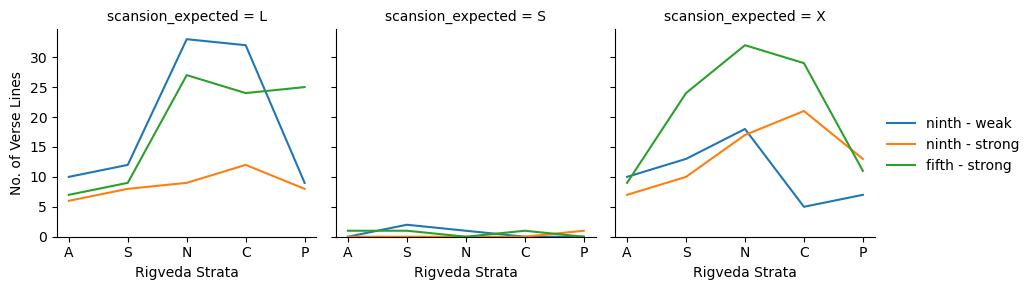

In [30]:
import seaborn as sns

#sns.lineplot(x='stanza_strata', y='count', hue='stem_class', data=df_stem_scansion_strata_counts)

g = sns.FacetGrid(col='scansion_expected', data=df_stem_scansion_strata_counts)
g.map(sns.lineplot, 'stanza_strata', 'count', 'stem_class')
g.set(
    xlabel="Rigveda Strata", ylabel="No. of Verse Lines",
    ylim=0,
)
g.add_legend()

# add overall title
#g.fig.subplots_adjust(top=0.8)
#
#g.fig.suptitle("Total Verse Lines by Rigveda Strata")
#g.tight_layout()
#
#g.fig.suptitle("Total Verse Lines by Rigveda Strata", y=1.05)

# add caption at the bottom (testing)
#caption = "$\it{Figure\ 1}$. Total Verse Lines by Rigveda Strata."
##from textwrap import wrap
##caption = "\n".join(wrap(caption, 60))
#g.fig.text(0.5, -0.10, caption, wrap=True, horizontalalignment='center')

TODO plot percentage insead of counts here?

#### Stem vowel in expected long (L) positions

For the ninth class, seems to be that usage of weak stem in long syllables jumps significantly over time (specifcally from strophic to normal strata), compared to the same for strong. TODO ensure that this is not because of a bias (eg: thematic/person shifts)

It's also interesting that weak ninth class patterns with strong fifth class -- the vowel in strong fifth is `o` (considered long, historically from diphthong `*au`).

The frequencies we see above are listed in the following table:

In [31]:
def get_strata_counts(stem_class, scansion_expected, drop_popular = False):
    df_strata_counts_temp = df_stem_scansion_strata_counts \
        .query(f'stem_class == "{stem_class}" and scansion_expected == "{scansion_expected}"') \
        .drop(columns=["scansion_expected", "stem_class"]) \
        ["count"].values.tolist() \
    
    return df_strata_counts_temp[:-1] if drop_popular else df_strata_counts_temp

In [32]:
df_l_strata_counts = pandas.DataFrame([
    # dropping the last value (for Popular strata) since it's an outlier and
    # also since we want to compare only the older stratas for a pattern
    ["ninth - weak"] + get_strata_counts("ninth - weak", "L", True),
    ["ninth - strong"] + get_strata_counts("ninth - strong", "L", True),
    ["fifth - strong"] + get_strata_counts("fifth - strong", "L", True),
], columns = ["stem_class", "A", "S", "N", "C"])

df_l_strata_counts

,stem_class,A,S,N,C
0,ninth - weak,10,12,33,32
1,ninth - strong,6,8,9,12
2,fifth - strong,7,9,27,24


In [ ]:
# install the module that provides fisher's exact test for mxn contingency table
# the one on scipy currently supports only 2x2: https://github.com/scipy/scipy/issues/7099
# in contrast to the one in R: https://stat.ethz.ch/R-manual/R-devel/library/stats/html/fisher.test.html
#
# via https://github.com/maclandrol/FisherExact
# also see https://web.archive.org/web/20201108131221/https://mrnoutahi.com/2016/01/03/Fisher-exac-test-for-mxn-table/

# install https://gcc.gnu.org/wiki/GFortranBinaries
# pre-req for the module below
#!apt install gfortran # for ubuntu

!pip install FisherExact

In [34]:
from FisherExact import fisher_exact as fisher_exact_generalized

In [35]:
# with ninth class strong
# p-value < 0.10 here (null hypothesis is false)
# i.e. there is a difference between the two classes
fisher_exact_generalized([
    get_strata_counts("ninth - weak", "L", True),
    get_strata_counts("ninth - strong", "L", True),
])

0.07134858550252425

In [36]:
# with fifth class strong
# p-value > 0.10 here (null hypothesis is true)
# i.e. there is no difference between the two classes
fisher_exact_generalized([
    get_strata_counts("ninth - weak", "L", True),
    get_strata_counts("fifth - strong", "L", True),
])

0.7992222340852158

These values also capture the intuitive understanding of the plots above: when ignoring the popular strata (which is an outlier), the ninth weak class behaves differently from the ninth strong, but is similar to the fifth class strong. 

---

Alternate analysis: partititioning the strata into archaic and non-archaic groups so that we get a 2x2 table suitable for use with scipy's fisher's exact test

In [37]:
# with ninth class strong
# should have been less than 0.10?
stats.fisher_exact([
    # AS-NCP
    [22, 74],
    [14, 29],
    
    # AS-NC
    #[22, 65],
    #[14, 21],
    
    # A-SNCP
    #[10, 86], 
    #[6, 37],
    
    # A-SNC
    #[10, 77], 
    #[6, 29],
])

SignificanceResult(statistic=0.6158301158301158, pvalue=0.29495439148665537)

In [38]:
# with fifth class strong
stats.fisher_exact([
    # AS-NCP
    [22, 74],
    [16, 76],
    
    # AS-NC
    #[22, 65],
    #[16, 51],
])

SignificanceResult(statistic=1.412162162162162, pvalue=0.3691436621692654)

#### Stem vowel in expected short (S) positions

Counts for all the stem classes are very low, and is just a reiteration of the numbers we saw in analysis section 3.  

In [39]:
df_s_strata_counts = pandas.DataFrame([
    ["ninth - weak"] + get_strata_counts("ninth - weak", "S"),
    ["ninth - strong"] + get_strata_counts("ninth - strong", "S"),
    ["fifth - strong"] + get_strata_counts("fifth - strong", "S"),
], columns = ["stem_class", "A", "S", "N", "C", "P"])

df_s_strata_counts

,stem_class,A,S,N,C,P
0,ninth - weak,0,2,1,0,0
1,ninth - strong,0,0,0,0,1
2,fifth - strong,1,1,0,1,0


In [40]:
# TODO create 2x2 contingency table instead with stratas paritioned into two groups?
fisher_exact_generalized([
    get_strata_counts("ninth - weak", "S", True),
    get_strata_counts("ninth - strong", "S", True),
])

1.0

In [41]:
fisher_exact_generalized([
    get_strata_counts("ninth - weak", "S", True),
    get_strata_counts("fifth - strong", "S", True),
])

0.999999999999999

#### Stem vowel in expected short/long (X) positions

No discernible pattern in the graphs, but also see the significance tests below.

In [42]:
df_x_strata_counts = pandas.DataFrame([
    ["ninth - weak"] + get_strata_counts("ninth - weak", "X"),
    ["ninth - strong"] + get_strata_counts("ninth - strong", "X"),
    ["fifth - strong"] + get_strata_counts("fifth - strong", "X"),
], columns = ["stem_class", "A", "S", "N", "C", "P"])

df_x_strata_counts

,stem_class,A,S,N,C,P
0,ninth - weak,10,13,18,5,7
1,ninth - strong,7,10,17,21,13
2,fifth - strong,9,24,32,29,11


In [43]:
# with ninth class strong
# p-value < 0.10 here (null hypothesis is false)
# i.e. there is a difference between the two classes
stats.fisher_exact([
    # AS-NCP (using the split established from the graph for L positions)
    [23, 30], 
    [17, 51],
    
    # AS-NC
    #[23, 23], 
    #[17, 38],
    
    # ASN-CP
    #[41, 12],
    #[34, 34],
    
    # ASN-C
    #[41, 5],
    #[34, 21],
])

SignificanceResult(statistic=2.3, pvalue=0.050768701616043466)

In [44]:
# with fifth class strong
# p-value > 0.10 here (null hypothesis is true)
# i.e. there is no difference between the two classes
stats.fisher_exact([
    # AS-NCP (using the split established from the graph for L positions)
    [23, 30], 
    [33, 72],
    
    # AS-NC
    #[23, 23], 
    #[33, 61],
    
    # ASN-CP
    #[41, 12],
    #[65, 40],
    
    # ASN-C
    #[41, 5],
    #[65, 29],
])

SignificanceResult(statistic=1.6727272727272726, pvalue=0.160247581546397)

#### Total counts of stem class over strata (without grouping by expected scansion)

To make sure that the frequency charts we are seeing is not just reflective of the overall frequency across strata.

Also note that by design, we are interested only in the weak stem with vowel and thus the counts here are not reflective of the overall weak stem counts (i.e. those that don't have the vowel).  

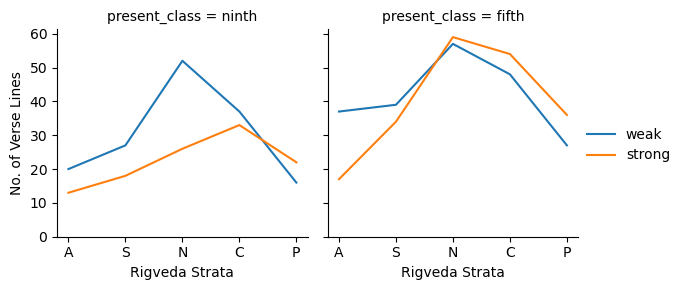

In [45]:
# without grouping by scansion_expected
df_stem_strata_counts = df_rv_lines_with_meter_filtered[COLUMNS_BASE] \
    .groupby([
        "present_class", "stem_type", "stanza_strata"
    ]) \
    .size().to_frame("count").reset_index() \
    .sort_values(
        ["present_class", "stem_type", "stanza_strata"],
        ascending=[False, False, True]
    )

g = sns.FacetGrid(col='present_class', data=df_stem_strata_counts)
g.map(sns.lineplot, 'stanza_strata', 'count', 'stem_type')
g.set(
    xlabel="Rigveda Strata", ylabel="No. of Verse Lines",
    ylim=0,
)
g.add_legend()

# add overall title
#g.fig.subplots_adjust(top=0.8)
#
#g.fig.suptitle("Total Verse Lines by Rigveda Strata")
#g.tight_layout()
#
#g.fig.suptitle("Total Verse Lines by Rigveda Strata", y=1.05)

#### Total counts of lines over strata (for ninth and fifth classes overall)

[Text(0.5, 0, 'Rigveda Strata'),
 Text(0, 0.5, 'No. of Verse Lines'),
 (0.0, 199.35)]

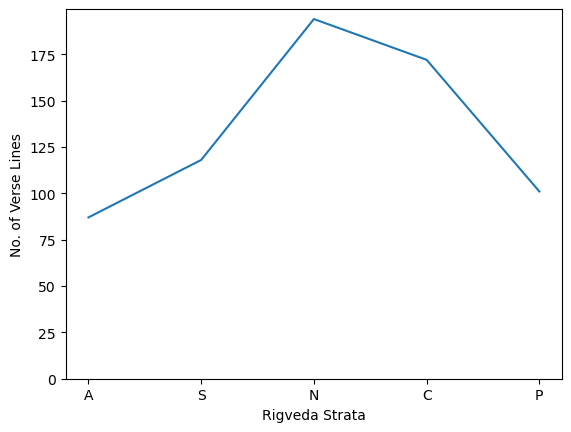

In [46]:
# for lines overall
df_strata_counts = df_rv_lines_with_meter_filtered[COLUMNS_BASE] \
    .groupby("stanza_strata") \
    .size().to_frame("count").reset_index()

sns.lineplot(x='stanza_strata', y='count', data=df_strata_counts) \
    .set(
        #title="Total Verse Lines by Rigveda Strata (Ninth & Fifth Class)",
        xlabel="Rigveda Strata", ylabel="No. of Verse Lines",
        ylim=0
    )

#### Total counts of lines over strata (all of RV)

In [16]:
# see 1_raw_corpus.ipynb for details on this file
df_rv_strata_vedaweb  = pandas.read_csv("data/rv_strata_vedaweb.csv", keep_default_na=False)
#df_rv_strata_vedaweb.head()

df_rv_strata_vedaweb["strata"] = pandas.Categorical(
    df_rv_strata_vedaweb["strata"],
    [
        "A", # archaic
        "S", # strophic
        "N", # normal
        "C", # cretic
        "P", # popular
        #"a", "s", "n", "c", "p", # minor stratas
    ]
)

df_strata_counts_overall = df_rv_strata_vedaweb \
    .groupby("strata") \
    .size().to_frame("count").reset_index()

# replace the abbreviations
#strata_mapping = {
#    'A': "Archaic",
#    'S': "Strophic",
#    'N': "Normal",
#    'C': "Cretic",
#    'P': "Popular",
#}
#df_strata_counts_overall["strata"] = df_strata_counts_overall["strata"].replace(strata_mapping)

df_strata_counts_overall

,strata,count
0,A,8566
1,S,9340
2,N,9846
3,C,6670
4,P,5411


[Text(0.5, 0, 'Rigveda Strata'),
 Text(0, 0.5, 'No. of Verse Lines'),
 (0.0, 10067.75)]

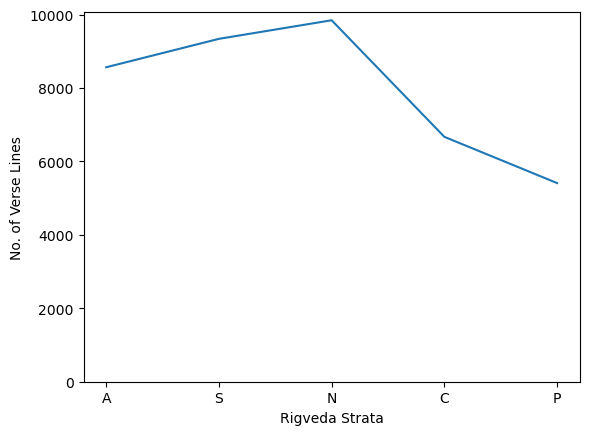

In [17]:
sns.lineplot(x='strata', y='count', data=df_strata_counts_overall) \
    .set(
        #title="Total Verse Lines by Rigveda Strata",
        xlabel="Rigveda Strata", ylabel="No. of Verse Lines",
        ylim=0
    )

In [18]:
strata_counts_overall = df_strata_counts_overall["count"].values.tolist()

In [50]:
# verify that the trends in our classes (for L positions) is not reflecting
# the overall trend of RV strata counts (it's not since p < 0.10 for all classes)
[fisher_exact_generalized([get_strata_counts(stem_class, "L"), strata_counts_overall]) \
    for stem_class in ["ninth - weak", "ninth - strong", "fifth - strong"]]

[5.387829403419723e-08, 0.024672096371425107, 1.0706443990359844e-09]

In [51]:
# verify that the trends in our classes (for X positions) is not reflecting
# the overall trend of RV strata counts (it's not since p < 0.10 for all classes)
[fisher_exact_generalized([get_strata_counts(stem_class, "X"), strata_counts_overall]) \
    for stem_class in ["ninth - weak", "ninth - strong", "fifth - strong"]]

[0.04155203079783155, 0.00010678318208745876, 9.47407724425074e-06]

In [20]:
# test verifying: counts in proportion to the overall strata counts would give p > 0.10
fisher_exact_generalized([[n//1000 for n in strata_counts_overall], strata_counts_overall])

0.9999999999159586

#### Attestations of ninth class weak stems for normal (N) strata

To inspect that jump during normal is not biased towards a specific stem / hymn.

In [52]:
df_rv_lines_with_meter_filtered[COLUMNS_BASE] \
    .query('\
        present_class== "ninth" \
        and stem_type == "weak" \
        and meter_stem_vowel_position_scansion_expected == "L" \
        and stanza_strata == "N" \
    ') \
    .sort_values(["stem", "line_no"]) \
    #.groupby("stem").size() 

,present_class,stem_type,stem,line_no,text_samhitapatha,stanza_meter,meter_scansion_custom,meter_stem_vowel_position_scansion_expected,meter_stem_root_vowel_position_scansion_expected,meter_stem_positions,meter_faults,meter_notes,meter_has_restorations,pada_label,stanza_strata,stanza_strata_based_on_meter_only,stanza_late_addition,root,word,word_gloss
128,ninth,weak,gr̥ṇī,01.015.03.a,abhí yajñáṁ gr̥ṇīhi no,Gāyatrī,SS LL |SLS L,L,S,"[5, 6]",,,False,MO,N,False,,gr̥̄ 1,gr̥ṇīhi,2.SG.PRS.IMP.ACT
132,ninth,weak,gr̥ṇī,01.064.12.b,rudrásya sūnúṁ havásā gr̥ṇīmasi,Jagatī,"LLS LL ,SS|L SLSS",L,S,"[9, 10]",,,False,M,N,True,,gr̥̄ 1,gr̥ṇīmasi,1.PL.PRS.IND.ACT
137,ninth,weak,gr̥ṇī,02.009.04.b,chruṣṭī́ deṣṇám abhí gr̥ṇīhi rā́dhaḥ,Triṣṭubh,"LL LS,_SS S|LS LL",L,X,"[7, 8]",,caesura_position_inside_syllable=True,False,M,N,False,,gr̥̄ 1,gr̥ṇīhi,2.SG.PRS.IMP.ACT
140,ninth,weak,gr̥ṇī,02.033.12.c,bhū́rer dātā́raṁ sátpatiṁ gr̥ṇīṣe,Triṣṭubh,"LL LLL ,LS|L SLL",L,S,"[9, 10]",,,False,M,N,False,,gr̥̄ 1,gr̥ṇīṣe,1.SG.PRS.IND.MED
144,ninth,weak,gr̥ṇī,04.025.07.b,ásunvatā sutapā́ḥ sáṁ gr̥ṇīte,Triṣṭubh,"SLSL ,SSL |L SLL",L,S,"[9, 10]",,,False,M,N,False,,gr̥̄ 1,gr̥ṇīte,3.SG.PRS.IND.MED
145,ninth,weak,gr̥ṇī,05.034.09.a,sahasrasā́m ā́gniveśiṁ gr̥ṇīṣe,Triṣṭubh,"SLSL,_LSL|L SLL",L,S,"[9, 10]",,caesura_position_inside_syllable=True,False,M,N,False,['Grassmann (G)'],gr̥̄ 1,gr̥ṇīṣe,1.SG.PRS.IND.MED
165,ninth,weak,gr̥ṇī,10.092.14.b,gīrbhír u ̀ sváyaśasaṁ gr̥ṇīmasi,Jagatī,"LS_S · ,SSS|L SLSS",L,S,"[9, 10]",,,False,M,N,False,,gr̥̄ 1,gr̥ṇīmasi,1.PL.PRS.IND.ACT
195,ninth,weak,punī,01.015.02.b,potrā́d yajñám punītana,Gāyatrī,LL LL |SLSS,L,S,"[5, 6]",,,False,MO,N,False,,pū,punītana,2.PL.PRS.IMP.ACT
199,ninth,weak,punī,09.004.04.a,pávītāraḥ punītána,Gāyatrī,SLLL |SLSS,L,S,"[5, 6]",,,False,MO,N,False,,pū,punītána,2.PL.PRS.IMP.ACT
200,ninth,weak,punī,09.011.05.b,sutáṁ sómam punītana,Gāyatrī,SL LL |SLSS,L,S,"[5, 6]",,,False,MO,N,False,,pū,punītana,2.PL.PRS.IMP.ACT


### 6.  Lines with meter fault in the root vowel position

This is similar to analysis section 3, but for the root vowel in the stem (and not the suffix).

In [53]:
# no need for stem_type (strong/weak) here since in both case we expect the root vowel to be short
def query_by_root_vowel_position(present_class, scansion_expected):
    return df_rv_lines_with_meter_filtered[
        COLUMNS_BASE + ["meter_stem_root_vowel_position", "meter_fault_positions"]
    ] \
        .query(f'\
            meter_stem_root_vowel_position_scansion_expected == "{scansion_expected}" \
            and present_class == "{present_class}" \
        ') \
        .sort_values(["stanza_meter", "stem", "stanza_strata"])

#### For root vowel in expected long positions

Here's our expectations for the actual realization of the root vowel in these positions, when paired with possible meter faults:

1. Actual S (meter fault implied): need to restore the root vowel as long, probably a late addition
2. Actual L and meter faults: check if the fault is in the root vowel and if so, should consider restoring the root vowel to be short (preserving older situation)
3. Actual L and no meter faults: probably a late addition

In [54]:
query_by_root_vowel_position("ninth", "L")

,present_class,stem_type,stem,line_no,text_samhitapatha,stanza_meter,meter_scansion_custom,meter_stem_vowel_position_scansion_expected,meter_stem_root_vowel_position_scansion_expected,meter_stem_positions,...,meter_has_restorations,pada_label,stanza_strata,stanza_strata_based_on_meter_only,stanza_late_addition,root,word,word_gloss,meter_stem_root_vowel_position,meter_fault_positions
110,ninth,weak,śrīṇī,08.002.11.b,índremáṁ sómaṁ śrīṇīhi,Gāyatrī,LLL L|L LLS,S,L,"[6, 7]",...,False,MT,S,False,,śrī,śrīṇīhi,2.SG.PRS.IMP.ACT,6,"[5, 7]"
15,ninth,strong,gr̥bhṇā,05.031.07.c,śúṣṇasya cit pári māyā́ agr̥bhṇāḥ,Triṣṭubh,"LLS L ,SS L|L SLL",X,L,"[10, 11]",...,False,M,N,False,,gr̥bhⁱ,agr̥bhṇāḥ,2.SG.IPRF.IND.ACT,10,[]
183,ninth,strong,jānā,01.163.06.a,ātmā́naṁ te mánasārā́d ajānām,Triṣṭubh,"LLL L ,SSL|L_SLL",X,L,"[10, 11]",...,False,P,P,False,"['Grassmann (G)', 'Oldenberg (o)', 'Arnold (C1...",jñā,ajānām,1.SG.IPRF.IND.ACT,10,[]
222,ninth,strong,muṣṇā,10.067.06.d,árodayat paṇím ā́ gā́ amuṣṇāt,Triṣṭubh,"SLSL ,SS_L |L SLL",X,L,"[10, 11]",...,False,M,C,False,['Grassmann (G)'],muṣⁱ,amuṣṇāt,3.SG.IPRF.IND.ACT,10,[]
76,ninth,strong,ramṇā,05.032.01.b,tvám arṇavā́n badbadhānā́m̐ aramṇāḥ,Triṣṭubh,"S_LSL ,LSL|L_SLL",X,L,"[10, 11]",...,False,M,N,False,,ram,aramṇāḥ,2.SG.PRS.IND.ACT,10,[]
74,ninth,strong,ramṇā,02.012.02.b,yáḥ párvatān prákupitām̐ áramṇāt,Triṣṭubh,"L LSL ,SSS|L_SLL",X,L,"[10, 11]",...,False,M,C,False,,ram,áramṇāt,3.SG.PRS.IND.ACT,10,[]
77,ninth,strong,ramṇā,10.149.01.a,savitā́ yantraíḥ pr̥thivī́m aramṇād,Triṣṭubh,"SSL LL ,SS|L_SLL",X,L,"[10, 11]",...,False,P,P,False,['Arnold (C1)'],ram,aramṇāt,3.SG.PRS.IND.ACT,10,[]
1,ninth,strong,ubhnā,01.063.04.b,vr̥tráṁ yád vajrin vr̥ṣakarman ubhnā́ḥ,Triṣṭubh,"LL L LL ,SS|LS_LL",X,L,"[10, 11]",...,False,Mh,A,False,,ubh,ubhnā́ḥ,3.SG.PRS.INJ.ACT,10,[]


08.002.11.b and 01.163.06.a are the only instances of roots ending in a vowel (`śrī-` and `jā-`); others are in a legit long position. These two have long root vowels in the text, but the stanza for 01.163.06.a is marked as a late addition (based on the stanza_late_addition column) so we can leave it out. 

That leaves the case of 08.002.11.b where the long realization of the root vowel seems justified, based on the long scansion of its expected position in the meter. However, its pada_label (`T`) tells us it is following trochaic variant of the gayatri, and if the root vowel was actually short here, it would follow the meter (meter_faults column also notes the faulty cadence scansion here). Hence, we should restore the root vowel here to be actually short. Which matches the restorations of the root vowel elsewhere in the text, for the sake of the meter. 

~TODO incorporate trochaic gayatri in our meter analysis code, see if we catch other lines that are not following this meter even for the ninth class~ Done, see analysis above

#### For root vowel in expected short positions

Here's our expectations for the actual realization of the root vowel in these positions, when paired with possible meter faults:

1. Actual L (meter fault implied): probably a late addition
2. Actual S and meter faults: check if the fault is in the root vowel and if so, should consider restoring the root vowel to be long (i.e. this is likely a late additon)
3. Actual S and no meter faults: all good

In [55]:
# filtering only those with meter faults since for this case,
# no meter faults means it's not an abnormal case (eliminates case 3 above) 
query_by_root_vowel_position("ninth", "S").query("meter_faults != ''")

,present_class,stem_type,stem,line_no,text_samhitapatha,stanza_meter,meter_scansion_custom,meter_stem_vowel_position_scansion_expected,meter_stem_root_vowel_position_scansion_expected,meter_stem_positions,...,meter_has_restorations,pada_label,stanza_strata,stanza_strata_based_on_meter_only,stanza_late_addition,root,word,word_gloss,meter_stem_root_vowel_position,meter_fault_positions
121,ninth,strong,hruṇā,01.166.12.c,índraś caná tyájasā ví hruṇāti táj,Jagatī,LL S_LSSL |_LSLS L,L,S,"[8, 9, 10]",...,False,M,S,True,,hvr̥ hru,hruṇāti,3.SG.PRS.IND.ACT,9,[]
87,ninth,strong,riṇā,01.056.06.c,tuváṁ sutásya máde ariṇā apó,Jagatī,"SL SLS ,SL |SSL SL",L,S,"[9, 10]",...,False,M,S,False,['Grassmann (G)'],rī,ariṇāḥ,2.SG.IPRF.IND.ACT,9,"[7, 8]"
86,ninth,weak,riṇī,09.071.02.b,asurya\ṁ várṇaṁ ní riṇīte asya tám,Jagatī,"SLL LL ,S S|LL LS L",L,S,"[7, 8]",...,False,M,S,False,,rī,riṇīte,3.SG.PRS.INJ.MED,7,[9]
230,ninth,weak,vr̥ṇī,10.036.11.d,tád devā́nām ávo adyā́ vr̥ṇīmahe,Jagatī,"L LLL,_SL L|L SLSL",L,S,"[9, 10]",...,False,M,C,False,,vr̥ vr̥̄,vr̥ṇīmahe,1.PL.PRS.IND.MED,9,[6]
288,ninth,weak,vr̥ṇī,10.036.02.d,tád devā́nām ávo adyā́ vr̥ṇīmahe,Jagatī,"L LLL,_SL L|L SLSL",L,S,"[9, 10]",...,False,M,C,False,,vr̥ vr̥̄,vr̥ṇīmahe,1.PL.PRS.IND.MED,9,[6]
289,ninth,weak,vr̥ṇī,10.036.03.d,tád devā́nām ávo adyā́ vr̥ṇīmahe,Jagatī,"L LLL,_SL L|L SLSL",L,S,"[9, 10]",...,False,M,C,False,,vr̥ vr̥̄,vr̥ṇīmahe,1.PL.PRS.IND.MED,9,[6]
290,ninth,weak,vr̥ṇī,10.036.04.d,tád devā́nām ávo adyā́ vr̥ṇīmahe,Jagatī,"L LLL,_SL L|L SLSL",L,S,"[9, 10]",...,False,M,C,False,,vr̥ vr̥̄,vr̥ṇīmahe,1.PL.PRS.IND.MED,9,[6]
291,ninth,weak,vr̥ṇī,10.036.05.d,tád devā́nām ávo adyā́ vr̥ṇīmahe,Jagatī,"L LLL,_SL L|L SLSL",L,S,"[9, 10]",...,False,M,C,False,,vr̥ vr̥̄,vr̥ṇīmahe,1.PL.PRS.IND.MED,9,[6]
293,ninth,weak,vr̥ṇī,10.036.07.d,tád devā́nām ávo adyā́ vr̥ṇīmahe,Jagatī,"L LLL,_SL L|L SLSL",L,S,"[9, 10]",...,False,M,C,False,,vr̥ vr̥̄,vr̥ṇīmahe,1.PL.PRS.IND.MED,9,[6]
294,ninth,weak,vr̥ṇī,10.036.08.d,tád devā́nām ávo adyā́ vr̥ṇīmahe,Jagatī,"L LLL,_SL L|L SLSL",L,S,"[9, 10]",...,False,M,C,False,,vr̥ vr̥̄,vr̥ṇīmahe,1.PL.PRS.IND.MED,9,[6]


Looking at the word column, of these, there are no instances of case 1 above.

Also, for none of these, the position of the root vowel is also a position where meter is at fault (columns *meter_stem_root_vowel_position* and *meter_fault_positions* i.e. fault in the meter is elsewhere.

Hence, short vocalism of the root is justified in all instances (as it should be).

#### For root vowel in expected short/long positions

TODO Investigate distribution of root vocalism in expected long/short (X) positions too – here we are interested in total counts of long vs. short root vowels, as well as which integer positions of the meter they tend to occur in the most. See if any patterns emerge (based on results in 1, we know long root vocalism should be there for roots like `prī-` and `śrī-`)

In [56]:
#query_by_root_vowel_position("ninth", "X")

#### List of roots/stems exhibiting short root vocalism

Note: this list does not currently list roots/stems that exhibit this behaviour in the X positions (TODO add them. based on results in 1, we know prī- also shows short vocalism and since it's not present below, it must be in the X position, *or* in a stanza for which we don't know the meter)

TODO also compile a similar list for those with long root vocalism

In [57]:
# from previous sections, we know that there are no instances of
# short vowel in expected long position 
query_by_root_vowel_position("ninth", "S") \
    .groupby(["root", "stem"]).size() \
    .to_frame("count").reset_index() \
    .sort_values(["root", "stem"]) \
    #.groupby("root").size() # 15 roots

,root,stem,count
0,gr̥̄ 1,gr̥ṇā,4
1,gr̥̄ 1,gr̥ṇī,16
2,hr̥̄,hr̥ṇī,3
3,hvr̥ hru,hruṇā,1
4,jū,junā,4
5,jū,junī,1
6,kṣī,kṣiṇā,1
7,mr̥̄ 1,mr̥ṇī,1
8,mī 1,minā mīnā,15
9,pr̥̄ 1,pr̥ṇā,9
